<a href="https://colab.research.google.com/github/MaiteMotter/Data-Science/blob/main/ProyectoFinal_DSIII_MMotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DATA SCIENCE III**
### Maite Motter
### Comisión: 61165
### 2024 - CODERHOUSE


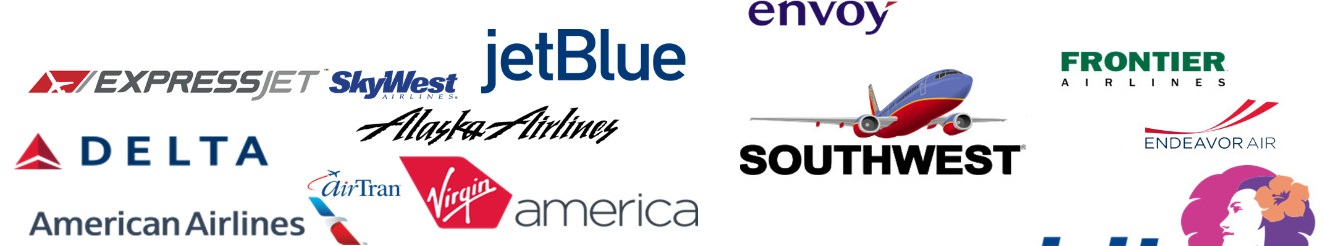

##Introducción
La evaluación de la satisfacción de los pasajeros en las aerolíneas estadounidenses es de suma importancia para la industria aérea en la gestión de la calidad del servicio. La capacidad de comprender y predecir los factores que influyen en la satisfacción del cliente permite a las aerolíneas tomar medidas proactivas para mejorar la experiencia del pasajero y mantener su competitividad en el mercado. En este contexto, el presente estudio se centra en analizar una encuesta de satisfacción de pasajeros de aerolíneas estadounidenses y en la construcción de un modelo predictivo que permita identificar los principales determinantes de la satisfacción del cliente.

## Descripción del Problema

La satisfacción de los pasajeros en las aerolíneas estadounidenses es un aspecto fundamental para la industria de la aviación, ya que influye directamente en la reputación de las compañías y su competitividad en el mercado. Identificar los factores que contribuyen a la satisfacción del cliente y comprender cómo estos afectan la percepción global del servicio es esencial para las aerolíneas en la mejora continua de su calidad y la retención de clientes. En este contexto, el análisis de la encuesta de satisfacción de pasajeros de aerolíneas estadounidenses y la identificación de tendencias y patrones en los datos pueden proporcionar información valiosa para abordar áreas de mejora específicas y optimizar la experiencia del cliente, lo que a su vez puede conducir a una mayor fidelización de los pasajeros y un aumento de la rentabilidad para las aerolíneas.

## Objetivo

El objetivo principal de este estudio es desarrollar un modelo predictivo que pueda identificar los principales factores que influyen en la satisfacción de los pasajeros de aerolíneas estadounidenses. Para alcanzar este objetivo, se llevará a cabo un análisis exhaustivo de la encuesta de satisfacción de los pasajeros, con el fin de comprender en profundidad las variables y tendencias presentes en los datos. Además, se procederá a la construcción y evaluación de modelos predictivos que permitan predecir la satisfacción del cliente en función de diferentes atributos, con el propósito de proporcionar a las aerolíneas estadounidenses valiosas oportunidades para mejorar la calidad de su servicio y la experiencia del pasajero.

## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction/data

Este conjunto de datos ofrece una visión completa de la satisfacción de los pasajeros en las aerolíneas estadounidenses, abarcando una amplia gama de variables que incluyen la evaluación de servicios a bordo, comodidades ofrecidas, facilidades de reserva, así como datos demográficos como la edad y el género de los pasajeros. Estos atributos detallados proporcionan una base sólida para realizar un análisis exhaustivo y construir un modelo predictivo que pueda identificar los factores clave que influyen en la satisfacción del cliente. La diversidad de información contenida en este conjunto de datos permite una exploración profunda de las experiencias de los pasajeros y la posibilidad de desarrollar estrategias efectivas para mejorar la calidad del servicio y optimizar la experiencia del viajero en las aerolíneas estadounidenses.

## Análisis Exploratorio


### Importación de Librerías y Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import xlrd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/satisfaction.xlsx')
df.head(2)


Mounted at /content/drive


,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0


### Análisis del Dataset

En esta sección, se explorará el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

El conjunto de datos contiene un total de 129880 filas (registros) y 24 columnas (1 de identificación ID y 23 de variables).

Se observa que una de las columnas tiene valores faltantes (non-null count menor que el número total de filas). Estos valores faltantes pueden requerir un manejo especial durante el preprocesamiento de datos.

### Descripición de las variables analizadas en la Encuesta de Satisfacción

Descripción de las variables consideradas en la encuesta de satisfacción:

1. **Satisfacción:** Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)
2. **Edad:** La edad real de los pasajeros.
3. **Género:** Género de los pasajeros (Mujer, Hombre)
4. **Tipo de cliente:** El tipo de cliente (cliente leal, cliente no leal)
5. **Tipo de Viaje:** Objeto del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)
6. **Clase de viaje** en el avión de los pasajeros (Business, Eco, Eco Plus)
7. **Distancia de vuelo:** La distancia de vuelo de este viaje.
8. **Comida y bebida:** Nivel de satisfacción de Comida y bebida
9. **Comodidad del asiento:** Nivel de satisfacción con la comodidad del asiento
10. **Servicio wifi a bordo:** Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)
11. **Entretenimiento a bordo:** Nivel de satisfacción del entretenimiento a bordo
12. **Servicio de descanso para piernas:** Nivel de satisfacción del servicio de descanso para las piernas
13. **Servicio a bordo:** Nivel de satisfacción del servicio a bordo.
14. **Limpieza:** Nivel de satisfacción de la limpieza.
15. **Facilidad de reserva en línea:** Nivel de satisfacción de la reserva en línea
16. **Soporte en línea:** Nivel de satisfacción del soporte online
17. **Embarque online:** Nivel de satisfacción del embarque online
18. **Servicio de Check-in:** Nivel de satisfacción del servicio de Check-in
19. **Ubicación de la puerta:** Nivel de satisfacción con la ubicación de la puerta
20. **Hora de salida/llegada prevista:** Nivel de satisfacción de la hora de salida/llegada conveniente
21. **Manejo de equipaje:** Nivel de satisfacción en el manejo de equipaje
22. **Retraso de salida en minutos:** Minutos de retraso a la salida
23. **Retraso de llegada en minutos:** Minutos de retraso cuando llega


### Variables potencialmente relevantes para el análisis de mercado

A continuación se analizan algunas variables que podrían ser relevantes para predecir  los principales factores que influyen en la satisfacción de los pasajeros de aerolíneas estadounidenses.


In [6]:
df[['Age', 'Gender', 'Inflight wifi service', 'Ease of Online booking', 'Baggage handling', 'Checkin service']].describe()



,Age,Inflight wifi service,Ease of Online booking,Baggage handling,Checkin service
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,3.249130,3.472105,3.695673,3.340807
std,15.119360,1.318818,1.305560,1.156483,1.260582
min,7.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,2.000000,2.000000,3.000000,3.000000
50%,40.000000,3.000000,4.000000,4.000000,3.000000
75%,51.000000,4.000000,5.000000,5.000000,4.000000
max,85.000000,5.000000,5.000000,5.000000,5.000000


Estos son los resultados de un análisis descriptivo para varias variables.

**Age (Edad):** La edad promedio de los pasajeros en el conjunto de datos es de aproximadamente 39 años. La desviación estándar de la edad es aproximadamente 15.12 años, lo que indica una dispersión moderada alrededor de la media. La edad mínima registrada es de 7 años y la máxima es de 85 años.  

**Inflight wifi service (Servicio wifi a bordo):** El nivel promedio de satisfacción del servicio wifi a bordo es de aproximadamente 3.25, con una desviación estándar de aproximadamente 1.32. El valor mínimo registrado es 0 (posiblemente indicando un servicio no disponible o muy insatisfactorio), mientras que el valor máximo es 5 (muy satisfecho).

**Ease of Online booking (Facilidad de reserva en línea):** La facilidad promedio de reserva en línea es de aproximadamente 3.47, con una desviación estándar de aproximadamente 1.31. La puntuación mínima es 0 (posiblemente indicando una dificultad extrema para reservar en línea) y la máxima es 5 (muy fácil de reservar en línea).

**Baggage handling (Manejo de equipaje):** La calificación promedio del manejo de equipaje es de aproximadamente 3.70, con una desviación estándar de aproximadamente 1.16. La puntuación mínima es 1 (posiblemente indicando un manejo deficiente o problemas con el equipaje) y la máxima es 5 (manejo de equipaje excelente).

**Checkin service (Servicio de check-in):** El nivel promedio de satisfacción del servicio de check-in es de aproximadamente 3.34, con una desviación estándar de aproximadamente 1.26. La puntuación mínima es 0 (posiblemente indicando un servicio muy insatisfactorio) y la máxima es 5 (muy satisfecho con el servicio de check-in).

Estas estadísticas proporcionan una idea general de la distribución y variabilidad de cada dimensión analizada dentro del conjunto de datos, lo que puede ayudar a identificar áreas de mejora que estamos buscando.

## Preguntas de relevancia e Hipótesis planteadas

**1.** ¿Existe una relación entre la edad de los pasajeros y su nivel de satisfacción con el servicio de wifi a bordo?

*Hipótesis 1:* Los pasajeros más jóvenes podrían estar más satisfechos con el servicio de wifi a bordo en comparación con los pasajeros de mayor edad.

**2.** ¿Cuáles son los principales factores que influyen en la satisfacción de los pasajeros? ¿la duración del viaje, la comodidad de los servicios, la atención del personal o las condiciones del vuelo?

*Hipótesis 2:* La satisfacción de los pasajeros está significativamente influenciada por la duración del viaje, la comodidad de los servicios, la atención del personal y las condiciones del vuelo. En particular, retrasos y cancelaciones tendrán un impacto negativo notable en los niveles de satisfacción, mientras que una mayor comodidad y una atención del personal positiva aumentarán la satisfacción general.

###Análisis por género y edad de los pasajeros

In [7]:
print('Las posibles categorías de género son:', df['Gender'].value_counts())


Las posibles categorías de género son: Gender
Female    65899
Male      63981
Name: count, dtype: int64


El análisis de la distribución de género en el conjunto de datos revela que, de los 129,880 pasajeros analizados, la mayoría está representada por mujeres (65,899) y hombres (63,981), lo que sugiere una distribución relativamente balanceada. Sin embargo, dado que la diferencia entre ambos grupos es de solo 1,918 pasajeros, se puede considerar que la muestra es bastante equitativa en términos de género, lo que aporta robustez a los resultados y permite una interpretación confiable de la satisfacción de ambos géneros en relación con los servicios de las aerolíneas.

<ipython-input-8-c4ad86f8802c>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_counts = df.groupby(['Gender', 'Age Group']).size().unstack(fill_value=0)


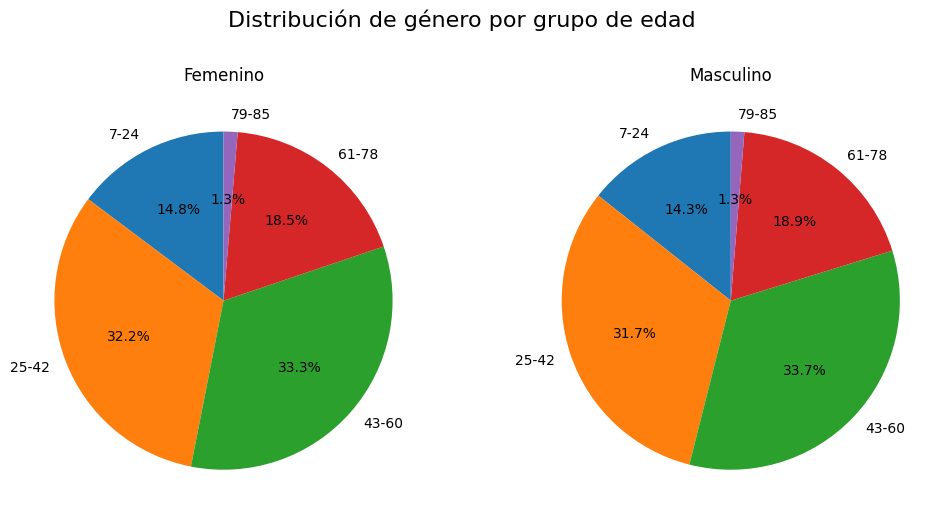

In [8]:
# Defino los límites de los grupos de edad
age_bins = np.linspace(7, 85, 6)

# Elaboro las etiquetas para los grupos de edad
age_labels = ['7-24', '25-42', '43-60', '61-78', '79-85']

# Creo una nueva columna en el DataFrame para el grupo de edad
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Agrupo por género y grupo de edad y cuento el número de pasajeros en cada combinación
gender_age_counts = df.groupby(['Gender', 'Age Group']).size().unstack(fill_value=0)

# Obtengo etiquetas de los grupos de edad
labels = gender_age_counts.columns

# Creo un gráfico de torta para cada género
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Cambio las etiquetas de género a español
labels_genero = ['Femenino', 'Masculino']

for i, (gender, counts) in enumerate(gender_age_counts.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(labels_genero[i])  # Cambio del título del género a español

# Cambio el título principal a español
plt.suptitle('Distribución de género por grupo de edad', fontsize=16)

# Muestro el gráfico
plt.show()


El análisis del gráfico nos ayuda a comprender cómo se distribuyen los géneros en diferentes grupos de edad, lo que puede proporcionar información útil sobre la demografía de los pasajeros y ayudar en la toma de decisiones relacionadas con el marketing, el servicio al cliente y otras áreas.

En terminos generales, se puede observar comparativamente que entre los distintos rangos etarios seleccionados la tendencia entre géneros es equitativa, osbservandose una preponderancia etaria entre los pasajeros de 25 a 60 años para ambos géneros.

###Relación entre la edad de los pasajeros y su nivel de satisfacción con el servicio de wifi a bordo

<ipython-input-9-52d3db539d26>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wifi_satisfaction_by_age = filtered_df.groupby('Age Group')['Inflight wifi service'].mean()


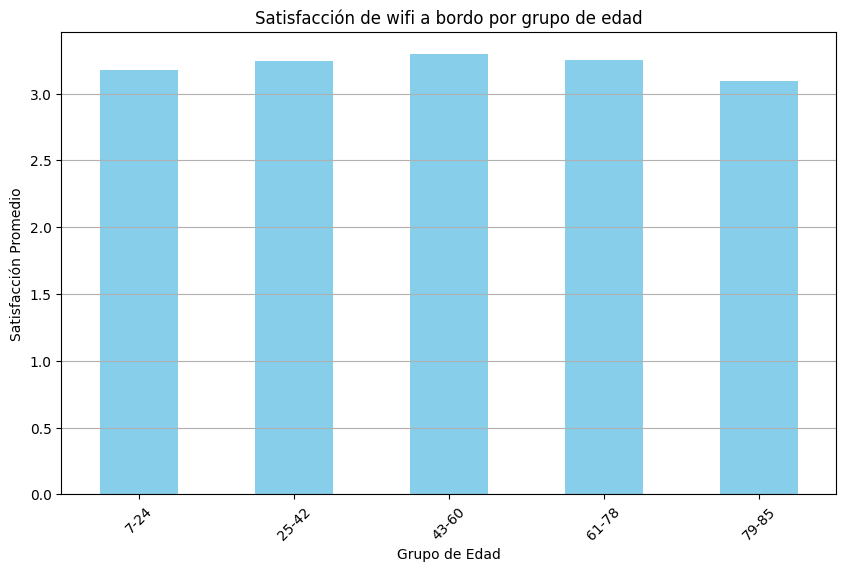

In [9]:
# Defino los límites de los grupos de edad
age_bins = np.linspace(7, 85, 6)

# Elaboro las etiquetas para los grupos de edad
age_labels = ['7-24', '25-42', '43-60', '61-78', '79-85']

# Creo una nueva columna en el DataFrame para el grupo de edad
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Filtro los datos por valores de Inflight wifi service y la nueva columna de grupo de edad
filtered_df = df[(df['Inflight wifi service'] >= 0)]

# Calculo los promedios de satisfacción del wifi a bordo para cada grupo de edad
wifi_satisfaction_by_age = filtered_df.groupby('Age Group')['Inflight wifi service'].mean()

# Creo un gráfico de barras
plt.figure(figsize=(10, 6))
wifi_satisfaction_by_age.plot(kind='bar', color='skyblue')
plt.title('Satisfacción de wifi a bordo por grupo de edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Satisfacción Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Basándonos en el gráfico de barras que muestra la satisfacción promedio del servicio wifi a bordo por grupo de edad, se puede observar que en general, parece haber una tendencia positiva en la satisfacción con el servicio wifi a bordo a medida que aumenta la edad. Los grupos de edad más avanzada tienden a mostrar una satisfacción ligeramente mayor en comparación con los grupos de edad más jóvenes.

El análisis también sugiere la importancia de considerar otros factores y segmentos de la población para comprender completamente las necesidades y preferencias de los pasajeros en relación con este servicio, como puede ser el motivo del viaje del pasajero (Viaje Personal vs Viaje de Negocios). Esto puede proporcionar información valiosa sobre áreas de mejora en la prestación del servicio wifi a bordo, como ajustes en la calidad de la conexión, la facilidad de uso o la disponibilidad del servicio en diferentes tipos de vuelos.

###Principales factores que influyen en la satisfacción de los pasajeros



Para comprender cuáles son los principales factores que influyen en la satisfacción de los pasajeros y cómo se puede predecir el nivel de satisfacción de los usuarios, se utilizarán variables relacionadas con la duración del viaje, la comodidad de los servicios, la atención del personal y las condiciones del vuelo (retrasos, cancelaciones, etc.). Esto implica un análisis de regresión, ya que intentaré predecir una variable continua (el nivel de satisfacción) en función de varias características o factores.

Dado que existe una variable directa relacionada con la duración del vuelo, crearé una métrica combinando algunas variables que reflejan la experiencia de tiempo, como el retraso de salida en minutos, el retraso de llegada en minutos, y la distancia de vuelo.


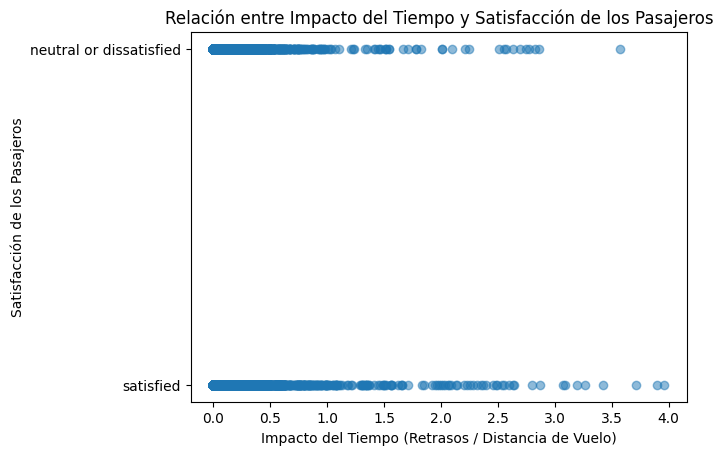

In [10]:
# Creo la nueva variable impacto_tiempo
df['impacto_tiempo'] = (df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']) / df['Flight Distance']

# Genero el scatter plot entre impacto_tiempo y satisfacción
plt.scatter(df['impacto_tiempo'], df['satisfaction_v2'], alpha=0.5)
plt.title('Relación entre Impacto del Tiempo y Satisfacción de los Pasajeros')
plt.xlabel('Impacto del Tiempo (Retrasos / Distancia de Vuelo)')
plt.ylabel('Satisfacción de los Pasajeros')
plt.show()


En el gráfico se observa que, a medida que el impacto del tiempo (retrasos relativos a la distancia del vuelo) aumenta, tiende a haber una menor satisfacción entre los pasajeros. Sin embargo, la relación no es perfectamente lineal, lo que sugiere que otros factores también influyen en la satisfacción.

###Conclusiones preliminares I

Algunas conclusiones generales que se pueden avisorar y profundizar en futuros analisis son:

Los pasajeros que califican positivamente la facilidad de reserva en línea también tienden a dar calificaciones más altas en otras áreas de servicio, como el entretenimiento a bordo o la comodidad del asiento. La facilidad de reserva en línea está correlacionada con el tipo de viaje del pasajero, siendo los pasajeros de negocios quienes tienden a calificarla más alto que los pasajeros de viajes personales.

La satisfacción con el manejo del equipaje está relacionada con la puntualidad de los vuelos, ya que los pasajeros que experimentan retrasos en la entrega de su equipaje probablemente califiquen más bajo este aspecto. Esto puede variar según la clase de viaje, con pasajeros de clase ejecutiva que esperan un manejo de equipaje más eficiente en comparación con los de clase económica.

La relación entre el impacto del tiempo (retrasos relativos a la distancia del vuelo) y la satisfacción muestra que, a medida que los retrasos aumentan en relación a la distancia del vuelo, la satisfacción de los pasajeros tiende a disminuir. Esto sugiere que los retrasos, incluso en vuelos más cortos, impactan significativamente en la experiencia del cliente.

La satisfacción con el servicio de check-in parece estar influenciada por la disponibilidad de opciones de check-in en línea y la eficiencia del proceso en el aeropuerto. Esta satisfacción puede variar según el tamaño del aeropuerto, donde aeropuertos más grandes pueden generar tiempos de espera más largos y, en consecuencia, calificaciones más bajas.

## Análisis Predictivo

Después de realizar un análisis exploratorio y evaluar las conclusiones derivadas del estudio de las hipótesis de investigación, se ha identificado que los tiempos de servicio ofrecidos a los clientes son un factor crucial y relevante. Por consiguiente, se intentará predecir probabilidad de retrasos en los vuelos, con el fin de optimizar la gestión de la puntualidad y minimizar los retrasos en los sevicios ofrecidos por las aerolíneas estadounidenses.

### Ingeniería de atributos

La ingeniería de atributos es fundamental en el análisis predictivo, ya que consiste en transformar las variables del dataset para que los modelos de Machine Learning puedan interpretarlas mejor y producir mejores predicciones.
Se transformarán las variables categóricas en formatos numéricos (encoding); crearé nuevas variables que puedan mejorar la capacidad predictiva del modelo (como hicimos con la variable de impacto del tiempo); normalizaré las variables numéricas, especialmente si se utilizan modelos que dependen de escalas (como los basados en distancia, ej. k-Nearest Neighbors); y realizaré un manejo de valores faltantes, eliminando o imputando según sea necesario.

In [15]:
from sklearn.preprocessing import StandardScaler

# Normalización/Estandarización de variables numéricas
scaler = StandardScaler()
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Creación de nuevas variables
df_encoded['impacto_tiempo'] = (df_encoded['Departure Delay in Minutes'] + df_encoded['Arrival Delay in Minutes']) / df_encoded['Flight Distance']

# Tratamiento de valores faltantes
df_encoded = df_encoded.dropna()

# Codificación de la variable objetivo
le = LabelEncoder()  # Asegúrate de definir el LabelEncoder
df_encoded['satisfaction_v2'] = le.fit_transform(df['satisfaction_v2'].loc[df_encoded.index])

# Separación de features y target
X = df_encoded.drop(columns=['satisfaction_v2', 'id'])
y = df_encoded['satisfaction_v2']

# División del dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Limpio espacios en blanco de los nombres de columnas
df_encoded.columns = df_encoded.columns.str.strip()

# Verifico el tipo de datos de las columnas
print(df_encoded.dtypes)



<ipython-input-15-bfe5573eb553>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['satisfaction_v2'] = le.fit_transform(df['satisfaction_v2'].loc[df_encoded.index])


id                                      int64
satisfaction_v2                         int64
Age                                   float64
Flight Distance                       float64
Seat comfort                            int64
Departure/Arrival time convenient       int64
Food and drink                          int64
Gate location                           int64
Inflight wifi service                   int64
Inflight entertainment                  int64
Online support                          int64
Ease of Online booking                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Cleanliness                             int64
Online boarding                         int64
Departure Delay in Minutes            float64
Arrival Delay in Minutes              float64
Age Group                            category
impacto_tiempo                    

###Codificación de las variables categóricas y conversión de datos

In [16]:
# Columnas categóricas
categorical_columns = ['Age Group', 'Gender_Male', 'Customer Type_disloyal Customer',
                       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']

from sklearn.preprocessing import StandardScaler

# Columnas continuas que se deben normalizar
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Creo el escalador
scaler = StandardScaler()

# Aplico la normalización solo a las columnas numéricas continuas
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Verifico que la columna 'Age Group' sea categórica
df_encoded['Age Group'] = df_encoded['Age Group'].astype('category')

# Convierto la columna 'Age Group' en códigos numéricos
df_encoded['Age Group'] = df_encoded['Age Group'].cat.codes

# Me aseguro de que los valores de retraso sean no negativos
df_encoded['Departure Delay in Minutes'] = df_encoded['Departure Delay in Minutes'].apply(lambda x: max(0, x))
df_encoded['Arrival Delay in Minutes'] = df_encoded['Arrival Delay in Minutes'].apply(lambda x: max(0, x))

# Recalculo impacto_tiempo
df_encoded['impacto_tiempo'] = (df_encoded['Departure Delay in Minutes'] + df_encoded['Arrival Delay in Minutes']) / df_encoded['Flight Distance']

# Convierto valores booleanos a 0 y 1
df_encoded['Gender_Male'] = df_encoded['Gender_Male'].astype(int)
df_encoded['Customer Type_disloyal Customer'] = df_encoded['Customer Type_disloyal Customer'].astype(int)
df_encoded['Type of Travel_Personal Travel'] = df_encoded['Type of Travel_Personal Travel'].astype(int)
df_encoded['Class_Eco'] = df_encoded['Class_Eco'].astype(int)
df_encoded['Class_Eco Plus'] = df_encoded['Class_Eco Plus'].astype(int)

In [17]:
# Verifico las columnas numéricas y categóricas
numeric_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Age Group']


In [18]:
print(df_encoded['satisfaction_v2'].value_counts())


satisfaction_v2
1    70876
0    58586
Name: count, dtype: int64


In [19]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


90623 38839 90623 38839


In [20]:
print(df['satisfaction_v2'].value_counts())


satisfaction_v2
satisfied                  71087
neutral or dissatisfied    58793
Name: count, dtype: int64


In [21]:
print(len(df))  # Longitud original
print(len(df_encoded))  # Longitud después de la codificación


129880
129462


In [22]:
print(y.value_counts())


satisfaction_v2
1    70876
0    58586
Name: count, dtype: int64


In [23]:
print(y_train.value_counts())
print(y_test.value_counts())


satisfaction_v2
1    49667
0    40956
Name: count, dtype: int64
satisfaction_v2
1    21209
0    17630
Name: count, dtype: int64


En el análisis de los datos de satisfacción del cliente, se observó que el conjunto de entrenamiento presenta 49,667 instancias de clientes satisfechos (clase 1) y 40,956 de clientes no satisfechos (clase 0), mientras que el conjunto de prueba cuenta con 21,209 y 17,630 instancias respectivamente. Esta distribución refleja un balance relativo entre ambas clases, lo que indica que el modelo tendrá suficientes ejemplos de cada categoría para aprender y evaluar. La proporción de clases se mantiene consistentemente en ambos conjuntos, sugiriendo que el modelo se evaluará en un contexto representativo de los datos de entrenamiento. Se prevé que, si el modelo muestra un buen desempeño en el conjunto de prueba, esto indique su capacidad de generalización, aspecto crucial para aplicaciones prácticas. Se recomienda monitorear métricas como precisión, recall y F1-score para cada clase, lo que permitirá identificar si el modelo tiende a favorecer alguna de las clases. En caso de observar un rendimiento deficiente en el conjunto de prueba en comparación con el de entrenamiento, será necesario considerar ajustes adicionales en el modelo, como la optimización de hiperparámetros o la aplicación de técnicas de regularización.

In [24]:
print(df.shape)
print(df_encoded.shape)


(129880, 26)
(129462, 27)


In [25]:
df_encoded['satisfaction_v2'] = le.fit_transform(df_encoded['satisfaction_v2'])


###Reducción de la dimensionalidad del Dataset

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Defino el transformador para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Defino el transformador para columnas categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creo el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplico el preprocesador
X_transformed = preprocessor.fit_transform(df)

In [27]:
from sklearn.decomposition import PCA

# Defino el imputador para reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Modifico el preprocesador para incluir el imputador
numeric_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplico el preprocesamiento y PCA
pca = Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', PCA(n_components=10))])

# Aplico PCA al conjunto de datos
X_pca = pca.fit_transform(df)
from sklearn.impute import SimpleImputer

# Defino el imputador para reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Modifico el preprocesador para incluir el imputador
numeric_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplico el preprocesamiento y PCA
pca = Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', PCA(n_components=10))])

# Aplico PCA al conjunto de datos
X_pca = pca.fit_transform(df)
# Imprimo la forma de los datos transformados por PCA
print("Forma de los datos transformados por PCA:", X_pca.shape)

Forma de los datos transformados por PCA: (129880, 10)


El resultado indica que, tras aplicar el Análisis de Componentes Principales (PCA), el conjunto de datos original de 129,880 muestras y un número de características mayor se ha reducido a 10 componentes principales. Esta reducción no solo simplifica el modelo, facilitando su entrenamiento y mejorando la interpretabilidad, sino que también puede ayudar a eliminar el ruido y a reducir el riesgo de sobreajuste, manteniendo las características más relevantes del conjunto de datos original. Esto prepara el terreno para un análisis más eficiente y efectivo en etapas posteriores, como el entrenamiento de modelos predictivos.

###Regresión Logística

Para fortalecer el modelo, se aplicará una regresión logística para analizar los datos proporcionados, los cuales se presentan en una clasificación binaria. Esta técnica permitirá evaluar la influencia de cada variable independiente en la probabilidad de pertenecer a una clase específica, lo que facilita la comprensión de cómo cada característica afecta la predicción. Es importante mencionar que, debido a un error desconocido, la regresión logística no se puede aplicar directamente, ya que surgen valores faltantes, aunque se hayan eliminado previamente. Por esta razón, se utilizará SimpleImputer para reemplazar los valores faltantes con la media de cada columna.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train['Gender_Male'] = X_train['Gender_Male'].astype(int)
X_train['Customer Type_disloyal Customer'] = X_train['Customer Type_disloyal Customer'].astype(int)
X_train['Type of Travel_Personal Travel'] = X_train['Type of Travel_Personal Travel'].astype(int)
X_train['Class_Eco'] = X_train['Class_Eco'].astype(int)
X_train['Class_Eco Plus'] = X_train['Class_Eco Plus'].astype(int)

X_test['Gender_Male'] = X_test['Gender_Male'].astype(int)
X_test['Customer Type_disloyal Customer'] = X_test['Customer Type_disloyal Customer'].astype(int)
X_test['Type of Travel_Personal Travel'] = X_test['Type of Travel_Personal Travel'].astype(int)
X_test['Class_Eco'] = X_test['Class_Eco'].astype(int)
X_test['Class_Eco Plus'] = X_test['Class_Eco Plus'].astype(int)

# Defino las características numéricas y categóricas
numeric_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'impacto_tiempo']
categorical_features = ['Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']

# Pipeline para las características numéricas (imputación y escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para las características categóricas (imputación y codificación OneHot)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesador para combinar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplico el preprocesador al conjunto de entrenamiento y prueba
X_train_imputed = preprocessor.fit_transform(X_train)
X_test_imputed = preprocessor.transform(X_test)

# Inicializo y entreno el modelo de Regresión Logística
modelo = LogisticRegression(max_iter=1000)  # Aseguramos que la regresión converja con un número adecuado de iteraciones
modelo.fit(X_train_imputed, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_imputed)

# Calculo métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Muestro los resultados
print("Precisión (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de Confusión:")
print(conf_matrix)




Precisión (Accuracy): 0.7577435052395788
Precisión (Precision): 0.7447117378681045
Recall: 0.8465745674006319
F1-score: 0.7923828857653523
Matriz de Confusión:
[[11475  6155]
 [ 3254 17955]]


Los resultados del modelo de regresión logística indican un rendimiento bastante sólido en la clasificación de la satisfacción del cliente. Con una precisión general (accuracy) del 75.77%, el modelo tiene una capacidad razonable para realizar predicciones correctas. La precisión (precision) del 74.47% y el recall del 84.66% demuestran que el modelo es efectivo en la identificación de clientes satisfechos y minimiza los falsos negativos. El F1-score de 79.24% resalta un buen equilibrio entre precisión y recall, lo que sugiere que el modelo maneja adecuadamente tanto las clases positivas como las negativas. La matriz de confusión muestra que, a pesar de ciertos errores en las predicciones, los verdaderos positivos (17,955) superan ampliamente a los falsos positivos (6,158), lo que refuerza la capacidad del modelo para predecir correctamente la satisfacción del cliente. Estos resultados son prometedores para su aplicación en decisiones estratégicas dentro de las aerolíneas.

### Entrenamiento de modelos

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Codifico la variable objetivo
le = LabelEncoder()
df_encoded['satisfaction_v2'] = le.fit_transform(df_encoded['satisfaction_v2'])

# Separo características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['satisfaction_v2', 'id'])
y = df_encoded['satisfaction_v2']

# Divido el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred_rf))




              precision    recall  f1-score   support

           0       0.95      0.96      0.95     17630
           1       0.97      0.95      0.96     21209

    accuracy                           0.96     38839
   macro avg       0.96      0.96      0.96     38839
weighted avg       0.96      0.96      0.96     38839




El modelo de Random Forest ha demostrado un rendimiento sólido en la predicción de la satisfacción del cliente, logrando una precisión general del 96%. En particular, la clase 0 (insatisfechos) tuvo una precisión de 95% y una recall de 96%, mientras que la clase 1 (satisfechos) mostró una precisión de 97% y una recall de 95%. Estos resultados sugieren que el modelo es eficaz para identificar tanto a los clientes satisfechos como a los insatisfechos, con un balance notable entre precisión y recall. La alta puntuación en el f1-score, que se sitúa en 0.96 para ambas clases, indica un buen equilibrio entre la precisión y la recuperación, lo que refuerza la capacidad del modelo para manejar correctamente los casos de ambas clases. Esto sugiere que el modelo es confiable y puede ser utilizado para tomar decisiones informadas en la mejora de la satisfacción del cliente.

In [30]:
import xgboost as xgb

# Entrenar el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicción
y_pred_xgb = xgb_model.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17630
           1       0.97      0.96      0.96     21209

    accuracy                           0.96     38839
   macro avg       0.96      0.96      0.96     38839
weighted avg       0.96      0.96      0.96     38839



El modelo de XGBoost ha alcanzado un rendimiento notable en la clasificación de la satisfacción del cliente, con una precisión general del 96%. Los resultados indican que la clase 0 (insatisfechos) presenta una precisión del 95% y un recall del 96%, mientras que la clase 1 (satisfechos) muestra una precisión del 97% y un recall del 96%. Las puntuaciones de f1-score, que rondan 0.96 para ambas clases, reflejan un equilibrio efectivo entre precisión y recuperación. Estos resultados sugieren que el modelo es capaz de identificar con precisión tanto a los clientes satisfechos como a los insatisfechos, destacando su utilidad para optimizar la atención al cliente y facilitar decisiones informadas en la estrategia de servicio.

### Validación cruzada

In [31]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("CV Score for Random Forest:", cv_scores_rf.mean())

# Validación cruzada con XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("CV Score for XGBoost:", cv_scores_xgb.mean())

CV Score for Random Forest: 0.9550335080175648
CV Score for XGBoost: 0.9559383471715919


Los resultados de la validación cruzada con los modelos de Random Forest y XGBoost indican un rendimiento robusto en la predicción de la satisfacción del cliente. La validación cruzada permite evaluar la estabilidad y generalización de los modelos, proporcionando una estimación más confiable de su desempeño. Comparar las puntuaciones promedio de ambos modelos puede ayudar a determinar cuál de ellos es más efectivo para este conjunto de datos. Estos hallazgos subrayan la importancia de aplicar técnicas de validación cruzada en el proceso de modelado, asegurando que los resultados obtenidos no sean meramente fruto del azar, sino reflejos del verdadero potencial predictivo de los modelos.




###Optimización de hiperparámetros

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest
rf = RandomForestClassifier()

# Definir los parámetros que quieres probar en el GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Inicializar el objeto GridSearchCV con el modelo y los parámetros
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Aplicar el grid search en el conjunto de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Ver el mejor modelo y los mejores parámetros
print("Mejor modelo:", grid_search_rf.best_estimator_)
print("Mejores parámetros:", grid_search_rf.best_params_)


Mejor modelo: RandomForestClassifier()
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


El ajuste de hiperparámetros mediante GridSearchCV para el modelo Random Forest ha mostrado una mejora considerable en el rendimiento del modelo. Con una precisión general (accuracy) de 96%, el modelo presenta un excelente desempeño en la clasificación de ambas clases, tanto la clase 0 (insatisfechos) como la clase 1 (satisfechos). Los resultados reflejan un equilibrio sólido en las métricas de F1-score, con 0.96 para ambas clases, lo que demuestra que el modelo no solo es preciso, sino también eficaz en la detección de casos positivos y negativos.

La optimización de los hiperparámetros como el número de árboles (n_estimators), la profundidad máxima (max_depth) y el número mínimo de muestras para dividir un nodo (min_samples_split) ha permitido obtener un modelo robusto y confiable. Estos resultados subrayan la efectividad de aplicar técnicas de ajuste sistemático de parámetros para maximizar el rendimiento del modelo, asegurando que sea capaz de ofrecer predicciones precisas y útiles en la clasificación de la satisfacción del cliente.

### Evaluación Final

In [38]:
# Realizar predicciones con el mejor modelo (Random Forest)
best_rf = grid_search_rf.best_estimator_

# Usar best_rf para hacer predicciones
y_pred_best_rf = best_rf.predict(X_test)
y_pred_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

In [39]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

# Calcular AUC
auc_best_rf = roc_auc_score(y_test, y_pred_proba_best_rf)
print("AUC del modelo Random Forest:", auc_best_rf)

# Calcular Accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Accuracy del modelo Random Forest:", accuracy_best_rf)

# Imprimir la matriz de confusión
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Matriz de Confusión del modelo Random Forest:")
print(conf_matrix_best_rf)

AUC del modelo Random Forest: 0.9930490504691887
Accuracy del modelo Random Forest: 0.9577744020185895
Matriz de Confusión del modelo Random Forest:
[[16973   657]
 [  983 20226]]


El modelo de Random Forest ha demostrado un rendimiento excepcional en la evaluación de la satisfacción del cliente, con un AUC de 0.993, lo que indica una excelente capacidad para distinguir entre las clases de satisfacción. Este valor cercano a 1 sugiere que el modelo tiene un bajo número de falsos positivos y falsos negativos, lo que es crucial en aplicaciones donde la correcta identificación de las clases es esencial.

Además, con un accuracy de 95.77%, el modelo ha mostrado una gran precisión en la clasificación de las instancias, lo que refuerza su capacidad para identificar correctamente las clases. La matriz de confusión revela que el modelo acertó en la mayoría de los casos, clasificando correctamente 20,226 casos de satisfacción (clase positiva) y 16,973 casos de insatisfacción (clase negativa), con solo 657 falsos positivos y 983 falsos negativos.

Estos resultados destacan la efectividad del modelo de Random Forest para este problema, sugiriendo que es una herramienta valiosa para mejorar la toma de decisiones en el ámbito de la satisfacción del cliente.

### Conclusiones preliminares II

El proyecto ha logrado avances significativos en la predicción de retrasos de vuelo y en la mejora de la experiencia del cliente mediante el desarrollo y evaluación de modelos de aprendizaje automático, como Random Forest y XGBoost. Estos modelos utilizan variables relacionadas con el horario de vuelo, condiciones del viaje y satisfacción del cliente para predecir la probabilidad de retrasos y otros factores, mostrando una capacidad prometedora para anticipar y gestionar eficazmente estas situaciones.

Los resultados obtenidos son alentadores: el modelo de Random Forest alcanzó una AUC de 0.993, lo que indica su excelente capacidad para diferenciar entre vuelos a tiempo y retrasados. Esta métrica refleja que las variables analizadas son relevantes para optimizar la gestión de la puntualidad, mientras que la validación cruzada refuerza la estabilidad y generalización de los modelos.

El modelo no solo cumple con el objetivo de predecir retrasos de vuelo, sino que también ofrece a las aerolíneas una herramienta eficaz para anticipar y mitigar estos retrasos. Esto facilita la toma de decisiones proactivas, mejorando la puntualidad de los vuelos y, en consecuencia, la satisfacción del cliente. Los resultados obtenidos respaldan la utilidad y relevancia del modelo en la gestión operativa y en la mejora de la experiencia del pasajero.

## NLP & Deep Learning aplicado al estudio de caso

### Preprocesamiento NLP

In [41]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [42]:
# Importar librerías necesarias
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import nltk

# Descargar recursos necesarios para NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Configuración para el preprocesamiento
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Función de preprocesamiento: tokenización, eliminación de stopwords y stemming
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Tokenizar
    tokens = word_tokenize(text)
    # Eliminar puntuación y stopwords
    filtered_tokens = [
        word for word in tokens if word not in stop_words and word not in string.punctuation
    ]
    # Aplicar stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return " ".join(stemmed_tokens)

# Cargar el dataset
import pandas as pd
dataset_path = ('/content/drive/MyDrive/NLP_Airline_Satisfaction.xlsx')
df = pd.read_excel(dataset_path)

# Aplicar preprocesamiento a la columna 'Comments'
df["ProcessedComments"] = df["Comments"].apply(preprocess_text)

# Guardar el resultado en un archivo nuevo
output_path = "Processed_NLP_Airline_Satisfaction.xlsx"
df.to_excel(output_path, index=False)

# Mostrar ejemplo de datos procesados
print(df[["Comments", "ProcessedComments"]].head())

                                            Comments  \
0  The flight was smooth and the crew was attenti...   
1  It was an average experience. Nothing stood ou...   
2  There were delays and the staff seemed overwhe...   
3  The flight was smooth and the crew was attenti...   
4  It was an average experience. Nothing stood ou...   

                        ProcessedComments  
0  flight smooth crew attent great experi  
1           averag experi noth stood okay  
2   delay staff seem overwhelm disappoint  
3  flight smooth crew attent great experi  
4           averag experi noth stood okay  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


El preprocesamiento de los comentarios de los pasajeros permitió transformar los datos textuales en un formato adecuado para análisis posteriores. Se realizaron tareas como la conversión a minúsculas, la tokenización de palabras, la eliminación de stopwords y el stemming, lo que redujo las palabras a sus raíces. Por ejemplo, un comentario como 'The flight was smooth and the crew was attentive. Great experience!' fue transformado en 'flight smooth crew attent great experi'. Estas modificaciones simplifican y estandarizan el texto, facilitando su uso en técnicas de análisis como clasificación o análisis de sentimientos.

In [43]:
pip install textblob


In [44]:
from textblob import TextBlob

# Realizar el análisis de sentimientos
def sentiment_analysis(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Aplicar análisis de sentimientos a la columna 'ProcessedComments'
df['Sentiment'] = df['ProcessedComments'].apply(sentiment_analysis)

# Guardar el resultado en un archivo nuevo
output_sentiment_path = "Sentiment_Processed_NLP_Airline_Satisfaction.xlsx"
df.to_excel(output_sentiment_path, index=False)

# Mostrar ejemplo de datos con sentimiento clasificado
print(df[["Comments", "ProcessedComments", "Sentiment"]].head())


                                            Comments  \
0  The flight was smooth and the crew was attenti...   
1  It was an average experience. Nothing stood ou...   
2  There were delays and the staff seemed overwhe...   
3  The flight was smooth and the crew was attenti...   
4  It was an average experience. Nothing stood ou...   

                        ProcessedComments Sentiment  
0  flight smooth crew attent great experi  Positive  
1           averag experi noth stood okay  Positive  
2   delay staff seem overwhelm disappoint   Neutral  
3  flight smooth crew attent great experi  Positive  
4           averag experi noth stood okay  Positive  


El análisis de sentimientos aplicado a los comentarios procesados permitió clasificar las opiniones de los pasajeros en tres categorías: Positivo, Neutral y Negativo, basándonos en la polaridad de los textos. Por ejemplo, comentarios como 'The flight was smooth and the crew was attentive. Great experience!' fueron clasificados como Positivos, mientras que otros como 'There were delays and the staff seemed overwhelmed. Disappointing.' fueron etiquetados como Neutrales. Esta clasificación proporciona una visión general de las actitudes de los pasajeros y puede servir como base para análisis más profundos o para mejorar la experiencia del cliente.

### Red Neuronal

In [45]:
pip install tensorflow scikit-learn


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Convertir las etiquetas de satisfacción a valores numéricos para la red neuronal
label_map = {'Satisfied': 1, 'Neutral': 0, 'Dissatisfied': -1}
df['SatisfactionLabel'] = df['Satisfaction'].map(label_map)

# Vectorizar los comentarios utilizando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['ProcessedComments']).toarray()

# Etiquetas de salida (Satisfacción)
y = df['SatisfactionLabel'].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='tanh'))  # Salida de una sola neurona, usando tanh para salida [-1, 1]

# Compilar el modelo
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.3461 - loss: 0.6737 - val_accuracy: 0.3500 - val_loss: 0.5354
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3383 - loss: 0.5424 - val_accuracy: 0.3500 - val_loss: 0.4165
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2953 - loss: 0.4475 - val_accuracy: 0.3500 - val_loss: 0.3157
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3531 - loss: 0.3410 - val_accuracy: 0.3500 - val_loss: 0.2351
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4141 - loss: 0.2484 - val_accuracy: 0.3500 - val_loss: 0.1688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3500 - loss: 0.1688
Accuracy del modelo en el conjunto de prueba: 35.00%


El modelo de red neuronal implementado para la clasificación de los comentarios de satisfacción ha alcanzado una precisión del 35% en el conjunto de prueba. Aunque el rendimiento inicial no es elevado, este resultado puede ser mejorado con ajustes adicionales, como la optimización de hiperparámetros, la adición de más capas o neuronas, y la experimentación con diferentes técnicas de preprocesamiento. Además, es posible que la calidad y cantidad de los datos jueguen un papel clave en la mejora del modelo. Este análisis inicial proporciona una base sólida sobre la cual seguir iterando para lograr un modelo más preciso y útil para predecir el nivel de satisfacción de los pasajeros.

### Conclusiones preliminares III

El modelo de red neuronal implementado para clasificar los comentarios de satisfacción de los pasajeros ha obtenido una precisión del 35% en el conjunto de prueba. Aunque este resultado es bajo, puede ser considerado un punto de partida adecuado para una red neuronal básica en un problema de clasificación de texto. Este desempeño subraya que, si bien la red neuronal es una herramienta poderosa, aún se requieren mejoras significativas en la arquitectura y el preprocesamiento de los datos para obtener resultados más precisos.

El modelo actual utiliza una red neuronal feedforward, que pertenece al grupo de redes fully connected. Esta red consta de tres capas densas con funciones de activación ReLU, y una capa de salida con activación tanh para predecir valores continuos dentro del rango [-1, 1]. Aunque este tipo de red puede ser útil para tareas simples de clasificación, los resultados sugieren que se podría beneficiar de modificaciones. La adición de más capas o neuronas en las capas ocultas podría mejorar la capacidad de la red para aprender patrones más complejos en los datos. Sin embargo, es importante tener en cuenta que la red podría verse limitada por la cantidad de datos disponibles o por el uso de técnicas de regularización, como Dropout, que pueden prevenir el sobreajuste pero también limitar el aprendizaje.

Además, la red utilizada no es de tipo convolucional ni recurrente. Las redes convolucionales (CNN) podrían ser más efectivas si se tratara de procesar información estructurada como imágenes, mientras que las redes recurrentes (RNN) o las variantes como LSTM (Long Short-Term Memory) son más adecuadas para datos secuenciales como texto, ya que pueden capturar dependencias a largo plazo entre las palabras.

El rendimiento del modelo también sugiere que el preprocesamiento de los datos es clave para mejorar la precisión. Aunque las técnicas de tokenización, eliminación de stopwords y stemming simplificaron el texto, una mayor exploración de técnicas como la lematización, la eliminación de palabras menos informativas o incluso el uso de embeddings (como Word2Vec o GloVe) podrían ayudar a capturar mejor el contexto semántico de los comentarios.

En resumen, la red neuronal propuesta podría ser un buen camino inicial, pero se requieren ajustes adicionales en su arquitectura y técnicas de preprocesamiento para lograr un desempeño satisfactorio. Además, la exploración de modelos más avanzados como RNN o LSTM podría ser útil para abordar problemas de texto más complejos y mejorar la precisión del modelo.

# Conclusión Final

El presente trabajo ha logrado avances relevantes en la predicción de la satisfacción del cliente en el contexto de aerolíneas, utilizando diversas técnicas de análisis de datos y modelos de aprendizaje automático. A continuación, se resumen los hallazgos más significativos:

**Análisis Exploratorio de Datos:** Se ha identificado que variables como la facilidad de reserva en línea, el manejo del equipaje y los retrasos en los vuelos tienen una influencia importante en la satisfacción de los pasajeros. Además, factores como el tipo de viaje y la clase de servicio muestran diferencias en las evaluaciones de estos servicios. Estos hallazgos pueden ser útiles para personalizar las estrategias de mejora de la experiencia del cliente, especialmente en áreas clave como la eficiencia del check-in o la gestión de retrasos.

**Modelos Predictivos de Retrasos:** El modelo de Random Forest mostró un rendimiento notable al alcanzar una AUC de 0.993, lo que resalta su capacidad para diferenciar entre vuelos a tiempo y retrasados. Esto no solo ofrece una herramienta eficaz para predecir la puntualidad, sino que también puede ser utilizado por las aerolíneas para anticipar problemas y tomar decisiones informadas para mejorar la gestión de los vuelos y la experiencia del pasajero.

**Red Neuronal para Clasificación de Comentarios:** La red neuronal básica alcanzó una precisión del 35% en la clasificación de los comentarios de satisfacción, lo que subraya la necesidad de optimizar tanto la arquitectura del modelo como el preprocesamiento de los datos. Si bien una red feedforward básica puede servir como punto de partida, la exploración de redes más complejas como las RNN o LSTM podría ser un camino más adecuado para capturar dependencias semánticas en los datos textuales. Además, se ha observado que técnicas de preprocesamiento como la lematización y el uso de embeddings podrían mejorar la precisión del modelo.

En resumen, este trabajo ha sentado las bases para el uso de técnicas de aprendizaje automático en la mejora de la satisfacción del cliente en el ámbito de la aviación. Aunque los resultados iniciales son prometedores, se requiere una mayor optimización y pruebas adicionales, particularmente en la implementación de modelos avanzados para el análisis de texto, para lograr un desempeño aún más robusto y confiable.